In [1]:
from pyCodeLib import *
import warnings
import glob
import re
import numpy as np
import pandas as pd
from Bio.PDB.Polypeptide import one_to_three

warnings.filterwarnings('ignore')


# sys.path.insert(0, MYHOME)
%load_ext autoreload
%autoreload 2

In [13]:
from collections import defaultdict
dataset = {"old":"1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", "),
            "new":"1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", "),
            "test":["t089", "t120", "t251", "top7", "1ubq", "t0766", "t0778", "t0782", "t0792", "t0803", "t0815", "t0833", "t0842", "t0844"]}
dataset["combined"] = dataset["old"] + dataset["new"]


pdb_list_dic = {"../iterative_optimization_old_set":"old",
                "../iterative_optimization_new_temp_range":"new",
                "../iterative_optimization_biased_sampling":"new"}
pdb_list_dic_rev = {"old":"iterative_optimization_old_set",
                        "new":"iterative_optimization_new_temp_range"}

iteration_source_dic = {"bias_2":"../iterative_optimization_biased_sampling",
                        "bias_old_gamma":"../iterative_optimization_biased_sampling",
                        "iter1_with_bias_96percent":"../iterative_optimization_new_temp_range",
                        "iter1_with_bias_98percent":"../iterative_optimization_new_temp_range",
                        "new_iter1_0":"../iterative_optimization_new_temp_range",
                        "new_iter1_90":"../iterative_optimization_new_temp_range",
                        "new_iter1_96":"../iterative_optimization_new_temp_range",
                        "new_iter1_98":"../iterative_optimization_new_temp_range",
                        "new_iter1_combined_on_B":"../iterative_optimization_new_temp_range",
                        "new_iter2_8":"../iterative_optimization_new_temp_range",
                        "new_iter2_10":"../iterative_optimization_new_temp_range",
                        "old_new_iter2_8":"../iterative_optimization_new_temp_range",
                        "new_iter3_10":"../iterative_optimization_old_set",
                        "single":"../iterative_optimization_old_set",
                        "iter4_30":"../iterative_optimization_old_set",
                        "iter4_6":"../iterative_optimization_old_set",
                        "iter4_13":"../iterative_optimization_old_set",
                        "iter5_30":"../iterative_optimization_old_set",
                        "iter6_30":"../iterative_optimization_old_set",
                        "noFrag":"../iterative_optimization_old_set",
                        "iter0_normalized_noFrag":"../iterative_optimization_combined_train_set",
                        "iter1_normalized_noFrag":"../iterative_optimization_combined_train_set",
                        "iter2_normalized_noFrag":"../iterative_optimization_combined_train_set",
                        "iter3_normalized_noFrag":"../iterative_optimization_combined_train_set",
                        "iter4_normalized_noFrag":"../iterative_optimization_combined_train_set",
                        "iter3_normalized_noFrag_90":"../iterative_optimization_combined_train_set",
                        "iter5_normalized_noFrag":"../iterative_optimization_combined_train_set_with_frag",
                        "original":"../iterative_optimization_combined_train_set_with_frag",
                        "iter6_normalized_noFrag":"../iterative_optimization_combined_train_set_with_frag",
                        }
pdb_list_dic = {"../iterative_optimization_old_set":"old",
                "../iterative_optimization_new_temp_range":"new",
                "../iterative_optimization_biased_sampling":"new",
                "../iterative_optimization_combined_train_set":"combined",
                "../iterative_optimization_combined_train_set_with_frag":"combined"}
# new_simulation_list = ["iter1_with_bias_96percent", "new_iter2_10"]
# old_protein_simulation_list = ["single", "new_iter3_10"]

# new_simulation_list = ["bias_2","bias_old_gamma", "iter1_with_bias_96percent", "iter1_with_bias_98percent", "new_iter2_10", "new_iter1_90", "new_iter2_8", "old_new_iter2_8"]
# old_protein_simulation_list = ["noFrag", "iter6_30", "iter5_30", "single", "new_iter3_10", "iter4_30", "iter4_6", "iter4_13"]
# combined_simulation_list = ["iter5_normalized_noFrag", "original", "iter0_normalized_noFrag", "iter1_normalized_noFrag", "iter2_normalized_noFrag", "iter3_normalized_noFrag", "iter4_normalized_noFrag", "iter3_normalized_noFrag_90"]
# new_data = ["iter5_normalized_noFrag", "original"]


new_simulation_list = ["bias_2","bias_old_gamma", "iter1_with_bias_96percent"]
old_protein_simulation_list = ["noFrag", "iter6_30"]
combined_simulation_list = ["iter6_normalized_noFrag", "iter5_normalized_noFrag", "original"]

simulation_location_list_dic = defaultdict(list)
for p in dataset["new"]:
    name = p.lower()[:4]
    simulation_location_list_dic[name] += new_simulation_list
for p in dataset["old"]:
    name = p.lower()[:4]
    simulation_location_list_dic[name] += old_protein_simulation_list
for p in dataset["combined"]:
    name = p.lower()[:4]
    simulation_location_list_dic[name] += combined_simulation_list

n = len(new_simulation_list) + len(combined_simulation_list)
decoy_n = 500


In [34]:
os.chdir("/Users/weilu/Research/server/april_2019/optimization_restart_iter7/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
gamma_file_name = "/Users/weilu/Research/server/april_2019/complete_gammas/iter_7"
data = validate_hamiltonian_wei("phi_list.txt", "proteins_name_list.txt", gamma_file_name, "lammps", n*decoy_n, mode=2, simulation_location_list_dic=simulation_location_list_dic)
data



0 (10.154043822951682+0j)


In [ ]:
os.chdir("/Users/weilu/Research/server/april_2019/optimization_restart_iter7/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
gamma_file_name = "/Users/weilu/Research/server/april_2019/complete_gammas/iter_7"
data = validate_hamiltonian_wei("phi_list.txt", "proteins_name_list.txt", gamma_file_name, "lammps", n*decoy_n, mode=2, simulation_location_list_dic=simulation_location_list_dic)
data

In [35]:
data

,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1fc2,10.154044,-27.085161,-7.354345,1.943149
1,1enh,8.877275,-27.665171,-8.428938,2.166907
2,2gb1,5.937489,-37.581250,-12.332865,4.252368
3,2cro,8.619145,-35.271993,-10.313247,2.895733
4,1ctf,4.435759,-31.683576,-12.154966,4.402541
5,4icb,8.580158,-40.696252,-15.550581,2.930677
6,1r69,4.898155,-34.693874,-9.786403,5.085072
7,1utg,2.369052,-28.734734,-12.974146,6.652698
8,3icb,4.179384,-40.380599,-13.230889,6.496103
9,256b,3.972753,-56.419267,-19.196171,9.369598


In [31]:
data = pd.concat([pd.Series(test_set), pd.Series(z_scores), pd.Series(e_natives), pd.Series(e_mgs), pd.Series(e_mg_stds)], axis=1) 
data.columns = ["Protein", "Z_scores", "E_native", "E_mgs", "Std_mg"]
data.Z_scores = data.Z_scores.astype(float)
data.E_native = data.E_native.astype(float)


In [32]:
data

,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1fc2,10.154044,-27.085161,-7.354345,1.943149
1,1enh,8.877275,-27.665171,-8.428938,2.166907
2,2gb1,5.937489,-37.581250,-12.332865,4.252368
3,2cro,8.619145,-35.271993,-10.313247,2.895733
4,1ctf,4.435759,-31.683576,-12.154966,4.402541
5,4icb,8.580158,-40.696252,-15.550581,2.930677
6,1r69,4.898155,-34.693874,-9.786403,5.085072
7,1utg,2.369052,-28.734734,-12.974146,6.652698
8,3icb,4.179384,-40.380599,-13.230889,6.496103
9,256b,3.972753,-56.419267,-19.196171,9.369598


In [62]:
location = "/Users/weilu/Research/server/april_2019/complete_gammas/iter0_gamma"
iter0_2 = np.loadtxt(location)


In [54]:
location = "/Users/weilu/Research/server/april_2019/complete_gammas/iter0_normalized_gamma"
iter0 = np.loadtxt(location)


In [50]:
location = "/Users/weilu/Research/server/april_2019/complete_gammas/iter_6"
iter6 = np.loadtxt(location)


In [38]:
location = "/Users/weilu/Research/server/april_2019/complete_gammas/original_gamma"
original = np.loadtxt(location)


In [39]:
original[:10]

array([-0.72008,  0.27029,  0.25968,  0.40222, -0.62053,  0.24469,
        0.34851,  0.11391,  0.12511, -1.     ])

In [40]:
np.std(original)

0.4362224236601442

In [41]:
np.std(iter6)

0.43622242366014424

In [51]:
np.std(iter0)

0.43622242366014413

In [55]:
np.mean(iter0)

-0.11822676745151585

In [42]:
np.mean(iter6)

0.010096234566005677

In [43]:
np.mean(original)

-0.11829680821739127

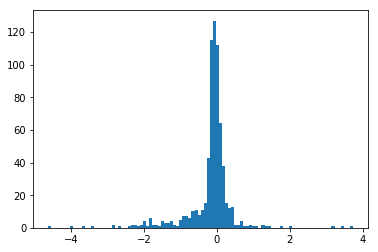

In [64]:
_ = plt.hist(iter0_2.flatten(), bins=100)

(-1, 1)

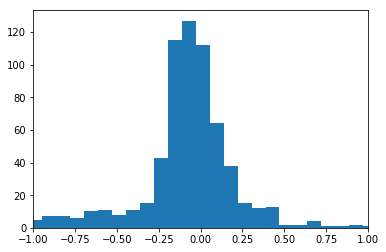

In [63]:
_ = plt.hist(iter0_2.flatten(), bins=100)
plt.xlim([-1,1])

(-1, 1)

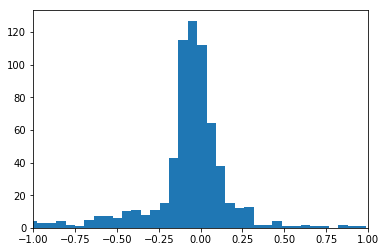

In [58]:
_ = plt.hist(iter0.flatten(), bins=100)
plt.xlim([-1,1])

(-1, 1)

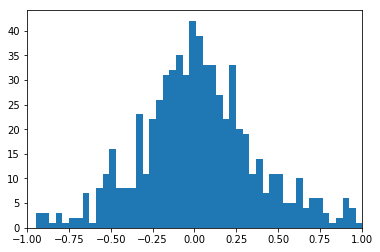

In [60]:
_ = plt.hist(iter6.flatten(), bins=100)
plt.xlim([-1,1])

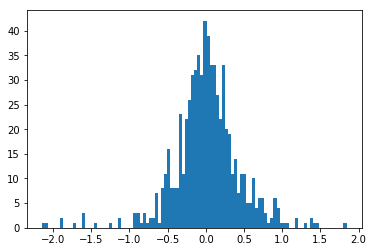

In [46]:
_ = plt.hist(iter6.flatten(), bins=100)

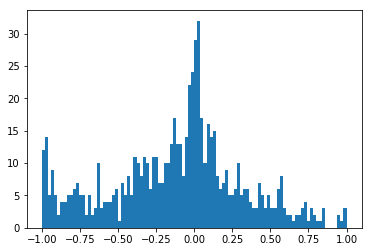

In [47]:
_ = plt.hist(original.flatten(), bins=100)

(-1, 1)

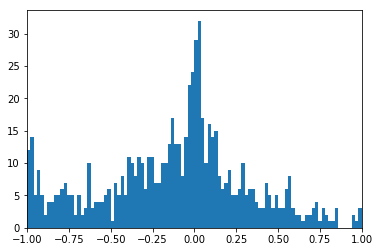

In [59]:
_ = plt.hist(original.flatten(), bins=100)
plt.xlim([-1,1])

In [78]:
def plot_contact_well(gammas, ax, fig, invert_sign=True, fix_colorbar=True, inferBound=False,
                        vmin=-0.3, vmax=0.3, fix_confidence_colorbar=True, confidence_vmin=0,
                        confidence_vmax=1.0, plot_confidence=False, confidence_lower=None, confidence_upper=None):
    size = 20
    interaction_matrix = np.zeros((size, size))
    i_content = 0
    for i in range(size):
        for j in range(i, size):
            index1 = hydrophobicity_map[inverse_res_type_map[i]]
            index2 = hydrophobicity_map[inverse_res_type_map[j]]
            interaction_matrix[index1][index2] = gammas[i_content]
            interaction_matrix[index2][index1] = gammas[i_content]
            i_content += 1


    # The minus sign is here to be consistent with the way AWSEM thinks about gammas
    if invert_sign:
        interaction_matrix *= -1

    if inferBound:
        vmin = np.min(interaction_matrix)
        vmax = np.max(interaction_matrix)

    if fix_colorbar:
        cax = ax.pcolor(interaction_matrix, vmin=vmin,
                        vmax=vmax, cmap="bwr")
    else:
        cax = ax.pcolor(interaction_matrix, cmap="RdBu_r")
    fig.colorbar(cax)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(interaction_matrix.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(interaction_matrix.shape[1]) + 0.5, minor=False)

    ax.set_xticklabels(hydrophobicity_letters)
    ax.set_yticklabels(hydrophobicity_letters)

    if plot_confidence:
        confidence_interval_size = confidence_upper - confidence_lower
        confidence_matrix = np.zeros((size, size))
        i_content = 0
        for i in range(size):
            for j in range(i, size):
                index1 = hydrophobicity_map[inverse_res_type_map[i]]
                index2 = hydrophobicity_map[inverse_res_type_map[j]]
                confidence_matrix[index1][index2] = confidence_interval_size[i_content]
                confidence_matrix[index2][index1] = confidence_interval_size[i_content]
                i_content += 1

        fig = plt.figure()
        ax = fig.add_subplot(111)
        if fix_confidence_colorbar:
            cax = ax.pcolor(confidence_matrix, vmin=confidence_vmin,
                            vmax=confidence_vmax, cmap="RdBu_r")
        else:
            cax = ax.pcolor(confidence_matrix, cmap="RdBu_r")
        fig.colorbar(cax)

        # put the major ticks at the middle of each cell
        ax.set_yticks(np.arange(confidence_matrix.shape[0]) + 0.5, minor=False)
        ax.set_xticks(np.arange(confidence_matrix.shape[1]) + 0.5, minor=False)

        ax.set_xticklabels(hydrophobicity_letters)
        ax.set_yticklabels(hydrophobicity_letters)


In [94]:
def plot_contact_well_all(gamma_complete, **kwargs):

    fig = plt.figure()
    st = fig.suptitle("suptitle", fontsize="x-large")
    ax = fig.add_subplot(311)
    gammas = gamma_complete[:210]
    _ = ax.set_title("Direct")
    plot_contact_well(gammas, ax, fig, **kwargs)
    ax = fig.add_subplot(312)
    gammas = gamma_complete[210:420]
    _ = ax.set_title("Protein")
    plot_contact_well(gammas, ax, fig, **kwargs)
 
    ax = fig.add_subplot(313)
    gammas = gamma_complete[420:630]
    _ = ax.set_title("Water")
    plot_contact_well(gammas, ax, fig, **kwargs)
    fig.tight_layout()
    # shift subplots down:
    st.set_y(0.95)
    fig.subplots_adjust(top=0.85)
#     plt.savefig('direct_contact.pdf')
    plt.show()


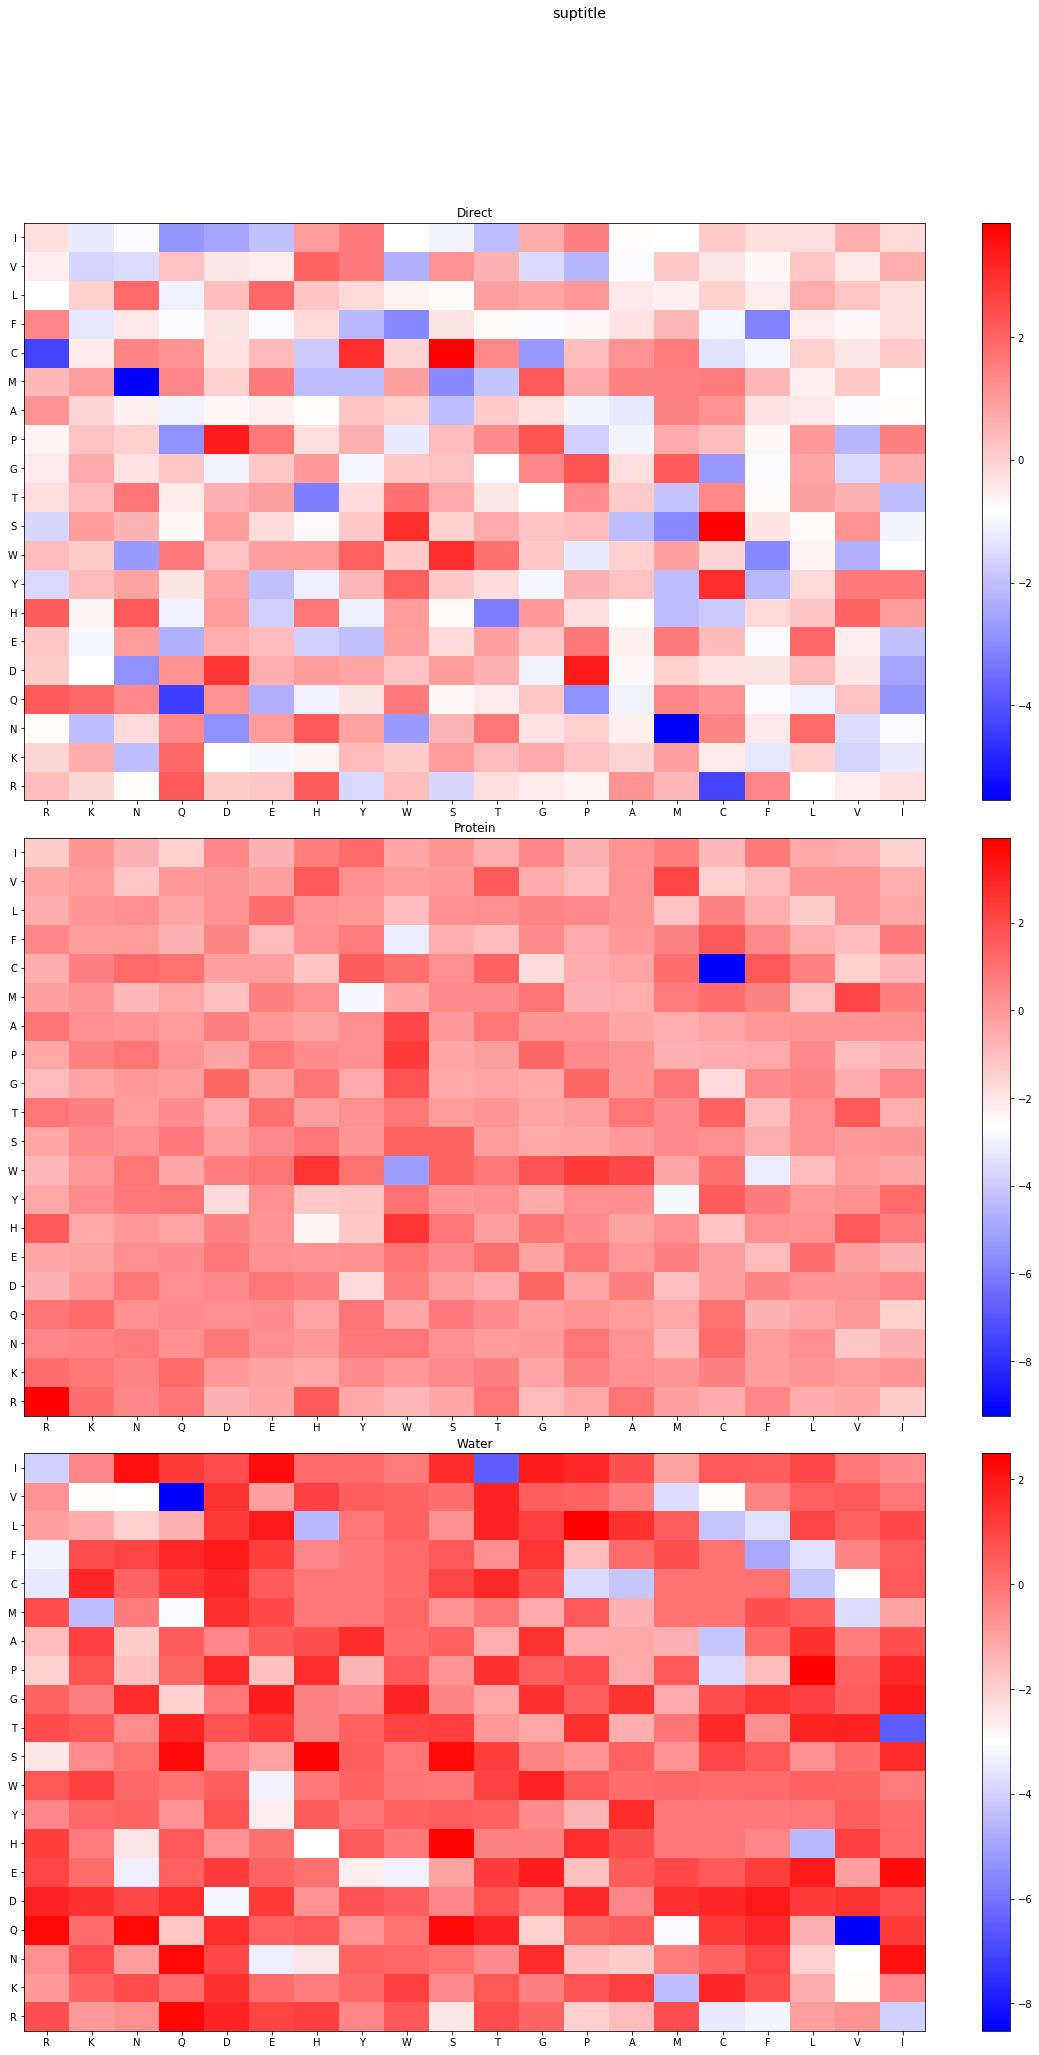

In [95]:
plt.rcParams['figure.figsize'] = [16.18033, 10*3]
pre = "/Users/weilu/Research/server/april_2019/optimization_with_frag_iter2/gammas/"
location=pre + "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0_gamma_filtered"
gamma = np.loadtxt(location)
plot_contact_well_all(gamma, inferBound=True, invert_sign=False, vmin=-2, vmax=2)


In [100]:
data = pd.read_csv("/Users/weilu/Downloads/TSLA (1).csv")

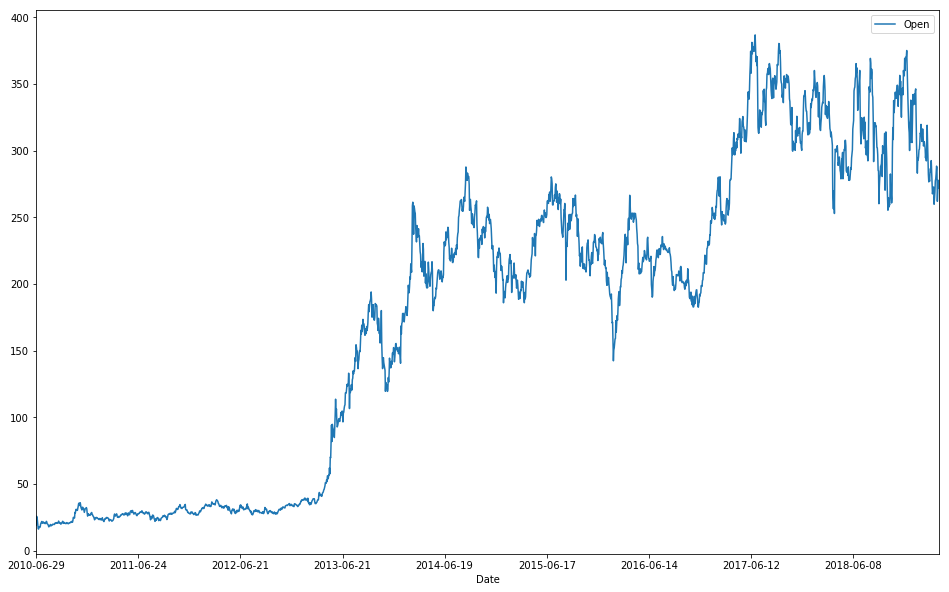

In [107]:
plt.rcParams['figure.figsize'] = [16.18033, 10]
data.plot("Date", "Open")

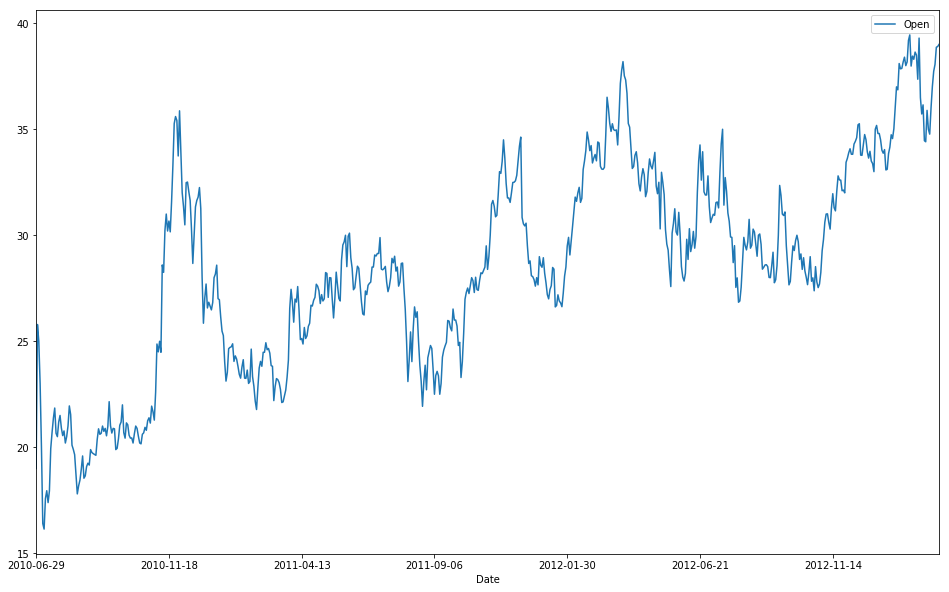

In [112]:
data.query("Date < '2013-03-14'").plot("Date", "Open")

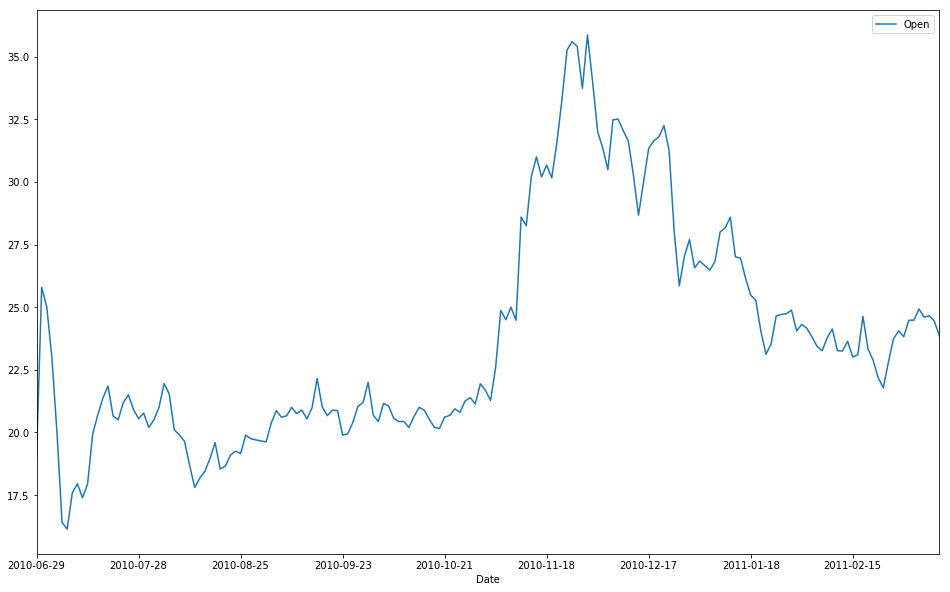

In [113]:
data.query("Date < '2011-03-14'").plot("Date", "Open")

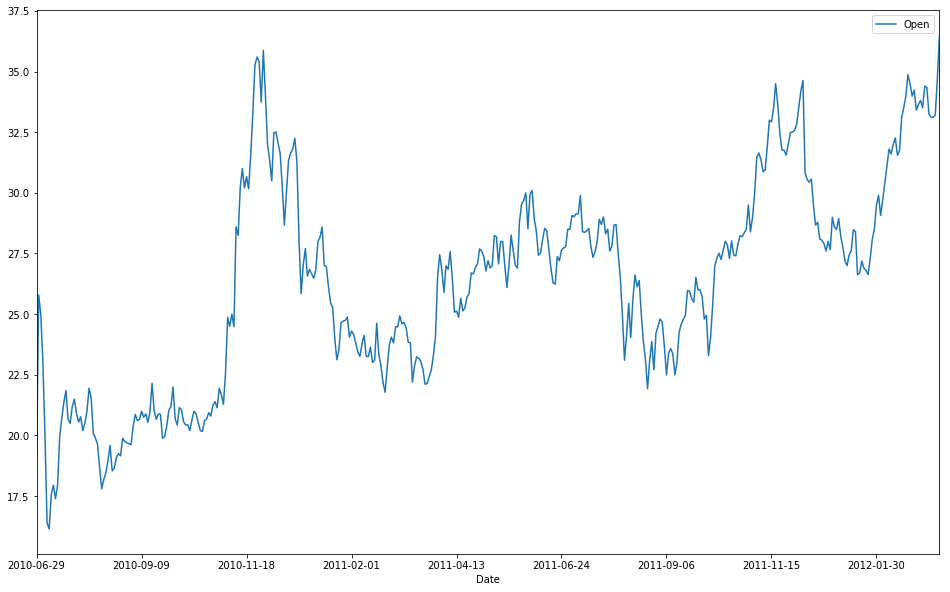

In [114]:
data.query("Date < '2012-03-14'").plot("Date", "Open")